# Хапов Андрей ИУ5-23М, Вариант 11

Задачи 11, 31

### Задачи.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения отдельной категорией для пропущенных значений.

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), прямой алгоритм (sequential forward selection).

Для студентов групп ИУ5-23М, ИУ5И-23М - для произвольной колонки данных построить график "Ящик с усами (boxplot)".


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sklearn
import random

In [53]:
data = pd.read_csv("10_Property_stolen_and_recovered.csv")
%matplotlib inline

In [54]:
data.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
5,Chandigarh,2001,Burglary - Property,3. Burglary,119,364,1804823,10217378
6,Chhattisgarh,2001,Burglary - Property,3. Burglary,1169,4144,6518261,30457033
7,Dadra & Nagar Haveli,2001,Burglary - Property,3. Burglary,10,34,247140,1333389
8,Daman & Diu,2001,Burglary - Property,3. Burglary,7,43,479300,2084845
9,Delhi,2001,Burglary - Property,3. Burglary,642,3029,39632177,150033824


In [55]:
def set_some_nan(df,index, column):
    if random.random() < 0.3:
        df.at[index, column] = None

In [56]:
# Искуственно создаём пустые поля
for i in range(data.shape[0]):
    set_some_nan(data, i, 'Sub_Group_Name')

In [57]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Area_Name', ('object', 0)),
 ('Year', ('int64', 0)),
 ('Group_Name', ('object', 0)),
 ('Sub_Group_Name', ('object', 754)),
 ('Cases_Property_Recovered', ('int64', 0)),
 ('Cases_Property_Stolen', ('int64', 0)),
 ('Value_of_Property_Recovered', ('int64', 0)),
 ('Value_of_Property_Stolen', ('int64', 0))]

In [58]:
data.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
5,Chandigarh,2001,Burglary - Property,None,119,364,1804823,10217378
6,Chhattisgarh,2001,Burglary - Property,None,1169,4144,6518261,30457033
7,Dadra & Nagar Haveli,2001,Burglary - Property,3. Burglary,10,34,247140,1333389
8,Daman & Diu,2001,Burglary - Property,3. Burglary,7,43,479300,2084845
9,Delhi,2001,Burglary - Property,3. Burglary,642,3029,39632177,150033824


## Устранение пропусков

In [64]:
def replace_nan_to_constant(df,index, column):
    if df.at[index, column] is None:
        df.at[index, column] = 'constant'

In [65]:
for i in range(data.shape[0]):
    replace_nan_to_constant(data, i, 'Sub_Group_Name')

In [66]:
data.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
5,Chandigarh,2001,Burglary - Property,constant,119,364,1804823,10217378
6,Chhattisgarh,2001,Burglary - Property,constant,1169,4144,6518261,30457033
7,Dadra & Nagar Haveli,2001,Burglary - Property,3. Burglary,10,34,247140,1333389
8,Daman & Diu,2001,Burglary - Property,3. Burglary,7,43,479300,2084845
9,Delhi,2001,Burglary - Property,3. Burglary,642,3029,39632177,150033824


In [67]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

# Все пустые поля были заменены на constant в столбце Sub_Group_Name

[('Area_Name', ('object', 0)),
 ('Year', ('int64', 0)),
 ('Group_Name', ('object', 0)),
 ('Sub_Group_Name', ('object', 0)),
 ('Cases_Property_Recovered', ('int64', 0)),
 ('Cases_Property_Stolen', ('int64', 0)),
 ('Value_of_Property_Recovered', ('int64', 0)),
 ('Value_of_Property_Stolen', ('int64', 0))]

## wrapper method прямой алгоритм (sequential forward selection).

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

In [100]:
X = data.drop(columns = ['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name'])
y = data['Sub_Group_Name']

feature_names = [i for i in X.columns]
feature_names

['Cases_Property_Recovered',
 'Cases_Property_Stolen',
 'Value_of_Property_Recovered',
 'Value_of_Property_Stolen']

In [101]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2021-04-06 01:49:14] Features: 1/3 -- score: 0.5157207023274806[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2021-04-06 01:49:14] Features: 2/3 -- score: 0.5234789710085749[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-04-06 01:49:14] Features: 3/3 -- score: 0.5234789710085749

## boxplot

<AxesSubplot:xlabel='Cases_Property_Recovered'>

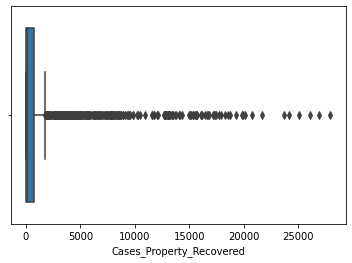

In [110]:
sns.boxplot(x=data['Cases_Property_Recovered']) 

<AxesSubplot:xlabel='Year'>

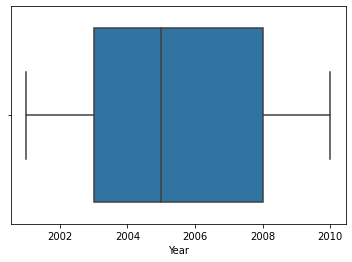

In [114]:
sns.boxplot(x=data['Year']) 